# BA4A - <u> Translate an RNA String into an Amino Acid String

In [ ]:
##################### HELPER FUNCTIONS ###########################
def get_codon_dict():
  return {'UUU': 'F', 'CUU': 'L', 'AUU': 'I', 'GUU': 'V', 'UUC': 'F', 'CUC': 'L', 'AUC': 'I', 'GUC': 'V', 'UUA': 'L', 'CUA': 'L', 'AUA': 'I', 'GUA': 'V', 'UUG': 'L', 'CUG': 'L', 'AUG': 'M', 'GUG': 'V', 'UCU': 'S', 'CCU': 'P', 'ACU': 'T', 'GCU': 'A', 'UCC': 'S', 'CCC': 'P', 'ACC': 'T', 'GCC': 'A', 'UCA': 'S', 'CCA': 'P', 'ACA': 'T', 'GCA': 'A', 'UCG': 'S', 'CCG': 'P', 'ACG': 'T', 'GCG': 'A', 'UAU': 'Y', 'CAU': 'H', 'AAU': 'N', 'GAU': 'D', 'UAC': 'Y', 'CAC': 'H', 'AAC': 'N', 'GAC': 'D', 'UAA': 'Stop', 'CAA': 'Q', 'AAA': 'K', 'GAA': 'E', 'UAG': 'Stop', 'CAG': 'Q', 'AAG': 'K', 'GAG': 'E', 'UGU': 'C', 'CGU': 'R', 'AGU': 'S', 'GGU': 'G', 'UGC': 'C', 'CGC': 'R', 'AGC': 'S', 'GGC': 'G', 'UGA': 'Stop', 'CGA': 'R', 'AGA': 'R', 'GGA': 'G', 'UGG': 'W', 'CGG': 'R', 'AGG': 'R', 'GGG': 'G'}


def translation(rna : str) -> str:
  ans = ""

  for i in range(0, len(rna), 3):
    if CODON_TABLE[rna[i:i+3]] == 'Stop':
      break
    
    ans += CODON_TABLE[rna[i:i+3]]


  return ans   

In [ ]:
# DRIVER CODE
rna = "AUGGCCAUGGCGCCCAGAACUGAGAUCAAUAGUACCCGUAUUAACGGGUGA"

print(translation(rna))

MAMAPRTEINSTRING


<hr>

# BA4B - <u> Find Substrings of a Genome Encoding a Given Amino Acid String 

In [ ]:
from collections import defaultdict
from itertools import product

#################### HELPER FUNCTIONS ##########################
def get_codon_dict():
  return {'UUU': 'F', 'CUU': 'L', 'AUU': 'I', 'GUU': 'V', 'UUC': 'F', 'CUC': 'L', 'AUC': 'I', 'GUC': 'V', 'UUA': 'L', 'CUA': 'L', 'AUA': 'I', 'GUA': 'V', 'UUG': 'L', 'CUG': 'L', 'AUG': 'M', 'GUG': 'V', 'UCU': 'S', 'CCU': 'P', 'ACU': 'T', 'GCU': 'A', 'UCC': 'S', 'CCC': 'P', 'ACC': 'T', 'GCC': 'A', 'UCA': 'S', 'CCA': 'P', 'ACA': 'T', 'GCA': 'A', 'UCG': 'S', 'CCG': 'P', 'ACG': 'T', 'GCG': 'A', 'UAU': 'Y', 'CAU': 'H', 'AAU': 'N', 'GAU': 'D', 'UAC': 'Y', 'CAC': 'H', 'AAC': 'N', 'GAC': 'D', 'UAA': 'Stop', 'CAA': 'Q', 'AAA': 'K', 'GAA': 'E', 'UAG': 'Stop', 'CAG': 'Q', 'AAG': 'K', 'GAG': 'E', 'UGU': 'C', 'CGU': 'R', 'AGU': 'S', 'GGU': 'G', 'UGC': 'C', 'CGC': 'R', 'AGC': 'S', 'GGC': 'G', 'UGA': 'Stop', 'CGA': 'R', 'AGA': 'R', 'GGA': 'G', 'UGG': 'W', 'CGG': 'R', 'AGG': 'R', 'GGG': 'G'}

def get_anti_codon_dict():
  codon_table = get_codon_dict()

  anti_codon_dict = defaultdict(list)

  for k, v in codon_table.items():
    anti_codon_dict[v].append(k)

  return anti_codon_dict


def reverse_complement(pattern):
  complement_table = {'A':'T', 'T':'A', 'G':'C', 'C':'G'}

  return  "".join(complement_table[nu] for nu in pattern[::-1])

def peptide_to_dna(peptide):
  anti_codon_table = get_anti_codon_dict()

  rna_list = [anti_codon_table[p] for p in peptide]


  return ["".join(s).replace('U','T') for s in product(*rna_list)]

############################################################################

def reverse_translation(dna_pattern, peptide):
  candidate_dna_list = peptide_to_dna(peptide)
  candidate_dna_list += [reverse_complement(d) for d in candidate_dna_list]

  k = len(peptide)*3

  return "\n".join(dna_pattern[i:i+k] for i in range(len(dna_pattern)-k+1) if dna_pattern[i:i+k] in candidate_dna_list)








In [ ]:
# DRIVER CODE
dna_pattern = "ATGGCCATGGCCCCCAGAACTGAGATCAATAGTACCCGTATTAACGGGTGA"
peptide = "MA"

reverse_translation(dna_pattern, peptide)

'ATGGCC\nGGCCAT\nATGGCC'

<hr>

# BA3C - <u> Generate the Theoretical Spectrum of a Cyclic Peptide

In [ ]:
####################################### HELPER FUNCTIONS #################################
def get_peptide_mass():
  return {
    'G': 57, 'A': 71, 'S': 87,'P': 97,'V': 99, 'T': 101,'C': 103, 
     'I': 113, 'L': 113, 'N': 114, 'D': 115, 'K': 128, 'Q': 128, 
     'E': 129, 'M': 131, 'H': 137,'F': 147,'R': 156,'Y': 163, 'W': 186}

def calculate_mass(peptide):
  mass_table = get_peptide_mass()

  return sum(mass_table[p] for p in peptide)

###########################################################################################

def theoretical_spectrum_from_cyclic(peptide):
  ln = len(peptide)
  spectra = ["", peptide]

  peptide = peptide + peptide[:-1]

  for k in range(1,ln):
    for i in range(ln):
      mass = peptide[i:i+k]
      spectra.append(mass)

  
  res = sorted([calculate_mass(s) for s in spectra])

  return " ".join([str(num) for num in res])

In [ ]:
# DRIVER CODE
peptide = 'LEQN'

theoretical_spectrum_from_cyclic(peptide)

'0 113 114 128 129 227 242 242 257 355 356 370 371 484'

<hr>

# BA4D - <u> Compute the Number of Peptides of Given Total Mass

In [ ]:
peptide_masses = [57, 71, 87, 97, 99, 101, 103, 113, 114, 115, 128, 129, 131, 137, 147, 156, 163, 186]

def peptide_count_for_mass(mass):
  masses = [0]*(mass+1)
  masses[0] = 1

  for i in range(mass+1):
    for j in range(len(peptide_masses)):
      if i >= peptide_masses[j]:
        masses[i] += masses[i-peptide_masses[j]]

  return masses[mass], masses

In [ ]:
# DRIVER CODE
mass = 1394

mass, masses = peptide_count_for_mass(mass)
print(mass)

375460980928373


# PLOT

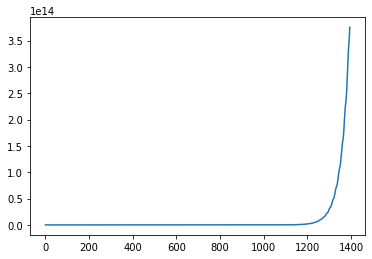

In [ ]:
import matplotlib.pyplot as plt

plt.plot(masses)

<hr>

# BA4E - <u> Find a Cyclic Peptide with Theoretical Spectrum Matching an Ideal Spectrum


In [93]:
################################### HELPER FUNCTIONS #################################
peptide_masses = [57, 71, 87, 97, 99, 101, 103, 113, 114, 115, 128, 129, 131, 137, 147, 156, 163, 186]

def trim_false_candidate(spectrum):
  return [s for s in spectrum if s in peptide_masses]

def expand(peptides, actual_candidate):
  res = []
  for peptide in peptides:
    for mass in actual_candidate:
      res.append(peptide + [mass] )

  return res

def cyclo_spectrum(peptide_mass_lst):
  ln = len(peptide_mass_lst)
  spectra = [0, sum(peptide_mass_lst)]

  peptide_mass_lst = peptide_mass_lst + peptide_mass_lst[:-1]

  for k in range(1,ln):
    for i in range(ln):
      mass = sum(peptide_mass_lst[i:i+k])
      spectra.append(mass)

  return sorted(spectra)

######################################################################################

def cyclopeptide_sequencing(spectrum):
  actual_candidate = trim_false_candidate(spectrum)

  res = []
  peptides = [[]]
  
  while True:
    peptides = expand(peptides, actual_candidate)

    for i in range(len(peptides)-1, -1, -1):
      summ = sum(peptides[i])
      if summ == spectrum[-1]:
        if cyclo_spectrum(peptides[i]) == spectrum:
          res.append(peptides[i])
      elif summ >= spectrum[-1] or any(mass not in spectrum for mass in peptides[i]):
        del peptides[i]

    if len(peptides) == 0:
      break

  return " ".join([f"{'-'.join(str(num) for num in peptide)}" for peptide in res])

In [94]:
# DRIVER CODE
spectrum = [int(num) for num in "0 113 128 186 241 299 314 427".split()]

cyclopeptide_sequencing(spectrum)

'186-128-113 186-113-128 128-186-113 128-113-186 113-186-128 113-128-186'

<hr>

# BA4F - <u> Compute the Score of a Cyclic Peptide Against a Spectrum

In [96]:
####################################### HELPER FUNCTIONS #################################
def get_peptide_mass():
  return {
    'G': 57, 'A': 71, 'S': 87,'P': 97,'V': 99, 'T': 101,'C': 103, 
     'I': 113, 'L': 113, 'N': 114, 'D': 115, 'K': 128, 'Q': 128, 
     'E': 129, 'M': 131, 'H': 137,'F': 147,'R': 156,'Y': 163, 'W': 186}

def calculate_mass(peptide):
  mass_table = get_peptide_mass()

  return sum(mass_table[p] for p in peptide)


def cyclo_spectrum(peptide):
  ln = len(peptide)
  spectra = ["", peptide]

  peptide = peptide + peptide[:-1]

  for k in range(1,ln):
    for i in range(ln):
      mass = peptide[i:i+k]
      spectra.append(mass)

  return sorted([calculate_mass(s) for s in spectra])

###########################################################################################
def cyclic_score(peptide, cyclic_spectrum):
  spectrum = cyclo_spectrum(peptide)

  ln_i = len(cyclic_spectrum)
  ln_j = len(spectrum)

  i,j = 0, 0
  score = 0
  
  while i<ln_i and j<ln_j:
    if cyclic_spectrum[i] == spectrum[j]:
      score += 1
      i += 1
      j += 1
    elif cyclic_spectrum[i] > spectrum[j]:
      j += 1
    else:
      i += 1

  return score



In [100]:
# DRIVER CODE
peptide = "NQEL"
spectrum = [int(num) for num in "0 99 113 114 128 227 257 299 355 356 370 371 484".split()]

peptide = "EAEYHMDHPFMAHFERHPMLDCFGVIKPAWSTFWKDK"

cyclic_score(peptide, spectrum)

8

<hr>

# BA4G - <u> Implement LeaderboardCyclopeptideSequencing

In [37]:
####################################### HELPER FUNCTIONS #################################
peptide_masses = [57, 71, 87, 97, 99, 101, 103, 113, 114, 115, 128, 129, 131, 137, 147, 156, 163, 186]

def get_peptide_mass():
  return {
    'G': 57, 'A': 71, 'S': 87,'P': 97,'V': 99, 'T': 101,'C': 103, 
     'I': 113, 'L': 113, 'N': 114, 'D': 115, 'K': 128, 'Q': 128, 
     'E': 129, 'M': 131, 'H': 137,'F': 147,'R': 156,'Y': 163, 'W': 186}


def calculate_mass(peptide):
  mass_table = get_peptide_mass()

  return sum(mass_table[p] for p in peptide)

def expand(peptides):
  res = []
  for peptide in peptides:
    for mass in peptide_masses:
      res.append(peptide + [mass] )

  return res


def linear_theoretical_spectrum(peptide_mass):
  ln = len(peptide_mass)
  subpeptide_lst = [0, sum(peptide_mass)]

  for k in range(1, ln):
    for i in range(ln-k+1):
      subpeptide_mass = sum(peptide_mass[i:i+k])
      subpeptide_lst.append(subpeptide_mass)
  
  return sorted(subpeptide_lst)

def cyclo_spectrum(peptide):
  ln = len(peptide)
  spectra = [0, sum(peptide)]

  peptide = peptide + peptide[:-1]

  for k in range(1,ln):
    for i in range(ln):
      mass = sum(peptide[i:i+k])
      spectra.append(mass)

  return sorted(spectra)


def cyclic_score(peptide_mass, cyclic_spectrum):
  spectrum = cyclo_spectrum(peptide_mass)

  ln_i = len(cyclic_spectrum)
  ln_j = len(spectrum)

  i,j = 0, 0
  score = 0
  
  while i<ln_i and j<ln_j:
    if cyclic_spectrum[i] == spectrum[j]:
      score += 1
      i += 1
      j += 1
    elif cyclic_spectrum[i] > spectrum[j]:
      j += 1
    else:
      i += 1

  return score


def linear_score(peptide, linear_spectrum):
  linear_cal_spec = linear_theoretical_spectrum(peptide)
  ln_i = len(linear_spectrum)
  ln_j = len(linear_cal_spec)

  i,j = 0, 0
  score = 0
  
  while i<ln_i and j<ln_j:
    if linear_spectrum[i] == linear_cal_spec[j]:
      score += 1
      i += 1
      j += 1
    elif linear_spectrum[i] > linear_cal_spec[j]:
      j += 1
    else:
      i += 1

  return score


def trim_leaderboard(leaderboard, spectrum, N):
  linearscores = []
  for peptide in leaderboard:
    linearscores.append((linear_score(peptide, spectrum), peptide))

  linearscores_ln = len(linearscores)

  if linearscores_ln == 0:
    return []

  linearscores.sort(key= lambda x : -x[0])

  tie_score = linearscores[linearscores_ln-1][0] if linearscores_ln < N else linearscores[N-1][0]

  final_leaderboard = []

  for l in linearscores:
    if l[0] < tie_score:
      break

    final_leaderboard.append(l[1])

  return final_leaderboard

###########################################################################################
def leaderboard_cyclopeptide_sequencing(spectrum, N):
  leaderboard = [[]]
  leaderpeptide = [0]

  while True:
    leaderboard = expand(leaderboard)
    
    for i in range(len(leaderboard)-1, -1, -1):
      summ  = sum(leaderboard[i])

      if summ == spectrum[-1]:
        if cyclic_score(leaderboard[i], spectrum) > cyclic_score(leaderpeptide, spectrum):
          leaderpeptide = leaderboard[i]

      elif summ >= spectrum[-1]:
        del leaderboard[i]
    
    leaderboard = trim_leaderboard(leaderboard, spectrum, N)
    
    if len(leaderboard) == 0:
      break

  
  return "-".join(str(num) for num in leaderpeptide)



In [43]:
# DRIVER CODE
N = 10
inp = "0 71 113 129 147 200 218 260 313 331 347 389 460"

spectrum = [int(num) for num in inp.split()]

leaderboard_cyclopeptide_sequencing(spectrum, N)

'129-113-147-71'

<hr>

# BA4H - <u> Generate the Convolution of a Spectrum

In [58]:
from collections import defaultdict

def generate_convolution_of_spec(spectrum):
  count_map = defaultdict(int)
  ln = len(spectrum)

  for i in range(1, ln):
    for j in range(i):
      if spectrum[i] == spectrum[j]:
        continue

      diff = abs(spectrum[i] - spectrum[j])
      count_map[diff] += 1

  convolutional_dict = sorted(count_map.items(), key= lambda x : x[1], reverse=True)
  
  return " ".join([ " ".join([str(item[0]) for i in range(item[1])]) for item in convolutional_dict])


In [65]:
spectrum = [int(num) for num in "0 137 186 323".split()]

generate_convolution_of_spec(spectrum)

'137 137 186 186 49 323'

<hr>

# BA4I - <u> Implement ConvolutionCyclopeptideSequencing

In [118]:
from collections import defaultdict

######################################### HELPER FUNCTIONS ##################################
def expand(peptides, actual_candidate):
  res = []
  for peptide in peptides:
    for mass in actual_candidate:
      res.append(peptide + [mass] )

  return res


def linear_theoretical_spectrum(peptide_mass):
  ln = len(peptide_mass)
  subpeptide_lst = [0, sum(peptide_mass)]

  for k in range(1, ln):
    for i in range(ln-k+1):
      subpeptide_mass = sum(peptide_mass[i:i+k])
      subpeptide_lst.append(subpeptide_mass)
  
  return sorted(subpeptide_lst)


def cyclo_spectrum(peptide):
  ln = len(peptide)
  spectra = [0, sum(peptide)]

  peptide = peptide + peptide[:-1]

  for k in range(1,ln):
    for i in range(ln):
      mass = sum(peptide[i:i+k])
      spectra.append(mass)

  return sorted(spectra)


def cyclic_score(peptide_mass, cyclic_spectrum):
  spectrum = cyclo_spectrum(peptide_mass)

  ln_i = len(cyclic_spectrum)
  ln_j = len(spectrum)

  i,j = 0, 0
  score = 0
  
  while i<ln_i and j<ln_j:
    if cyclic_spectrum[i] == spectrum[j]:
      score += 1
      i += 1
      j += 1
    elif cyclic_spectrum[i] > spectrum[j]:
      j += 1
    else:
      i += 1

  return score


def linear_score(peptide, linear_spectrum):
  linear_cal_spec = linear_theoretical_spectrum(peptide)
  ln_i = len(linear_spectrum)
  ln_j = len(linear_cal_spec)

  i,j = 0, 0
  score = 0
  
  while i<ln_i and j<ln_j:
    if linear_spectrum[i] == linear_cal_spec[j]:
      score += 1
      i += 1
      j += 1
    elif linear_spectrum[i] > linear_cal_spec[j]:
      j += 1
    else:
      i += 1

  return score


def trim_leaderboard(leaderboard, spectrum, N):
  linearscores = []
  for peptide in leaderboard:
    linearscores.append((linear_score(peptide, spectrum), peptide))

  linearscores_ln = len(linearscores)

  if linearscores_ln == 0:
    return []

  linearscores.sort(key= lambda x : -x[0])

  tie_score = linearscores[linearscores_ln-1][0] if linearscores_ln < N else linearscores[N-1][0]

  final_leaderboard = []

  for l in linearscores:
    if l[0] < tie_score:
      break

    final_leaderboard.append(l[1])

  return final_leaderboard


def leaderboard_cyclopeptide_sequencing(spectrum,actual_candidate, N):
  leaderboard = [[]]
  leaderpeptide = [0]

  while True:
    leaderboard = expand(leaderboard, actual_candidate)
    
    for i in range(len(leaderboard)-1, -1, -1):
      summ  = sum(leaderboard[i])

      if summ == spectrum[-1]:
        if cyclic_score(leaderboard[i], spectrum) >= cyclic_score(leaderpeptide, spectrum):
          leaderpeptide = leaderboard[i]

      elif summ >= spectrum[-1]:
        del leaderboard[i]
    
    leaderboard = trim_leaderboard(leaderboard, spectrum, N)
    
    if len(leaderboard) == 0:
      break

  
  return "-".join(str(num) for num in leaderpeptide)


def generate_convolution_of_spec(spectrum, M):
  count_map = defaultdict(int)
  ln = len(spectrum)

  for i in range(1, ln):
    for j in range(i):
      if spectrum[i] == spectrum[j]:
        continue

      diff = abs(spectrum[i] - spectrum[j])
      count_map[diff] += 1

  convolutional_dict = list(sorted(count_map.items(), key= lambda x : x[1], reverse=True))
  
  ln_convo = len(convolutional_dict)

  if ln>0 :
    tie_val = convolutional_dict[M-1][1] if M < ln_convo else convolutional_dict[ln_convo-1][1]

  res = set()

  for item in convolutional_dict:
    if item[1] < tie_val:
      break

    if item[0] >= 57 and item[0] <= 200:
      res.add(item[0])
  
  return res
###########################################################################################



def convolution_cyclopeptide_sequencing(M, N, spectrum):
  actual_candidate = (generate_convolution_of_spec(spectrum, M))

  return leaderboard_cyclopeptide_sequencing(spectrum, actual_candidate, N)

In [119]:
# DRIVER CODE
M = 20
N = 60
spectrum = [int(num) for num in "57 57 71 99 129 137 170 186 194 208 228 265 285 299 307 323 356 364 394 422 493".split()]

convolution_cyclopeptide_sequencing(M, N, spectrum)

'99-71-137-57-58-71'

<hr>

# BA4J - <u> Generate the Theoretical Spectrum of a Linear Peptide

In [ ]:
####################################### HELPER FUNCTIONS #################################
def get_peptide_mass():
  return {
    'G': 57, 'A': 71, 'S': 87,'P': 97,'V': 99, 'T': 101,'C': 103, 
     'I': 113, 'L': 113, 'N': 114, 'D': 115, 'K': 128, 'Q': 128, 
     'E': 129, 'M': 131, 'H': 137,'F': 147,'R': 156,'Y': 163, 'W': 186}

def calculate_mass(peptide):
  mass_table = get_peptide_mass()

  return sum(mass_table[p] for p in peptide)

###########################################################################################

def linear_theoretical_spectrum(peptide):
  ln = len(peptide)
  subpeptide_lst = ["", peptide]

  for k in range(1, ln):
    for i in range(ln-k+1):
      subpeptide = peptide[i:i+k]
      subpeptide_lst.append(subpeptide)

  res = sorted([calculate_mass(p) for p in subpeptide_lst])
  
  return " ".join([str(e) for e in res])

In [ ]:
# DRIVER CODE
peptide = "NQEL"

linear_theoretical_spectrum(peptide)

'0 113 114 128 129 242 242 257 370 371 484'

<hr>

# BA4K - <u> Compute the Score of a Linear Peptide

In [ ]:
####################################### HELPER FUNCTIONS #################################
def get_peptide_mass():
  return {
    'G': 57, 'A': 71, 'S': 87,'P': 97,'V': 99, 'T': 101,'C': 103, 
     'I': 113, 'L': 113, 'N': 114, 'D': 115, 'K': 128, 'Q': 128, 
     'E': 129, 'M': 131, 'H': 137,'F': 147,'R': 156,'Y': 163, 'W': 186}


def calculate_mass(peptide):
  mass_table = get_peptide_mass()

  return sum(mass_table[p] for p in peptide)


def linear_theoretical_spectrum(peptide):
  ln = len(peptide)
  subpeptide_lst = ["", peptide]

  for k in range(1, ln):
    for i in range(ln-k+1):
      subpeptide = peptide[i:i+k]
      subpeptide_lst.append(subpeptide)

  res = sorted([calculate_mass(p) for p in subpeptide_lst])
  
  return res

###########################################################################################
def calculate_score(peptide, linear_spectrum):
  linear_lst = [int(num) for num in linear_spectrum.split()]
  linear_cal_spec = linear_theoretical_spectrum(peptide)
  ln_i = len(linear_lst)
  ln_j = len(linear_cal_spec)

  i,j = 0, 0
  score = 0
  
  while i<ln_i and j<ln_j:
    if linear_lst[i] == linear_cal_spec[j]:
      score += 1
      i += 1
      j += 1
    elif linear_lst[i] > linear_cal_spec[j]:
      j += 1
    else:
      i += 1

  return score

In [ ]:
# DRIVER CODE
peptide = "NQEL"
spectrum = "0 99 113 114 128 227 257 299 355 356 370 371 484"

calculate_score(peptide, spectrum)

8

<hr>

# BA4L - <u> Trim a Peptide Leaderboard

In [2]:
####################################### HELPER FUNCTIONS #################################
def get_peptide_mass():
  return {
    'G': 57, 'A': 71, 'S': 87,'P': 97,'V': 99, 'T': 101,'C': 103, 
     'I': 113, 'L': 113, 'N': 114, 'D': 115, 'K': 128, 'Q': 128, 
     'E': 129, 'M': 131, 'H': 137,'F': 147,'R': 156,'Y': 163, 'W': 186}


def calculate_mass(peptide):
  mass_table = get_peptide_mass()

  return sum(mass_table[p] for p in peptide)


def linear_theoretical_spectrum(peptide):
  ln = len(peptide)
  subpeptide_lst = ["", peptide]

  for k in range(1, ln):
    for i in range(ln-k+1):
      subpeptide = peptide[i:i+k]
      subpeptide_lst.append(subpeptide)

  res = sorted([calculate_mass(p) for p in subpeptide_lst])
  
  return res

def linear_score(peptide, linear_spectrum):
  linear_lst = [int(num) for num in linear_spectrum]
  linear_cal_spec = linear_theoretical_spectrum(peptide)
  ln_i = len(linear_lst)
  ln_j = len(linear_cal_spec)

  i,j = 0, 0
  score = 0
  
  while i<ln_i and j<ln_j:
    if linear_lst[i] == linear_cal_spec[j]:
      score += 1
      i += 1
      j += 1
    elif linear_lst[i] > linear_cal_spec[j]:
      j += 1
    else:
      i += 1

  return score

###########################################################################################

def trim_leaderboard(leaderboard, spectrum, N):
  linearscores = []
  for peptide in leaderboard:
    linearscores.append((linear_score(peptide, spectrum), peptide))

  linearscores.sort(key= lambda x : -x[0])

  tie_score = linearscores[N-1][0]

  final_leaderboard = []

  for l in linearscores:
    if l[0] < tie_score:
      break
    
    final_leaderboard.append(l[1])

  return " ".join(final_leaderboard)

In [3]:
# DRIVER CODE
leaderboard = "LAST ALST TLLT TQAS".split()
spectrum = "0 71 87 101 113 158 184 188 259 271 372".split()
N = 2

trim_leaderboard(leaderboard, spectrum, N)

'LAST ALST'

<hr>